In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
from google.colab import files
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA

In [5]:
upload = files.upload()

Saving Datos_SI_Normalizado.xlsx to Datos_SI_Normalizado.xlsx


In [6]:
df = pd.read_excel(next(iter(upload)))

In [7]:
feature = ['MONTO_PIM','MONTO_CERTIFICADO','MONTO_COMPROMETIDO_ANUAL','MONTO_COMPROMETIDO','MONTO_DEVENGADO','MONTO_GIRADO']
datos =df[feature]

In [8]:
datos.head()

,MONTO_PIM,MONTO_CERTIFICADO,MONTO_COMPROMETIDO_ANUAL,MONTO_COMPROMETIDO,MONTO_DEVENGADO,MONTO_GIRADO
0,0.000000,0.272117,0.245611,0.004004,0.006408,0.5
1,0.000000,0.272117,0.245611,0.004004,0.006408,0.5
2,0.000000,0.272117,0.245611,0.004004,0.006408,0.5
3,0.000014,0.272117,0.245611,0.004004,0.006408,0.5
4,0.000004,0.272117,0.245611,0.004004,0.006408,0.5


In [89]:
x = datos[['MONTO_CERTIFICADO','MONTO_COMPROMETIDO_ANUAL']]
x = x.head(1000)

In [90]:
x

,MONTO_CERTIFICADO,MONTO_COMPROMETIDO_ANUAL
0,0.272117,0.245611
1,0.272117,0.245611
2,0.272117,0.245611
3,0.272117,0.245611
4,0.272117,0.245611
...,...,...
995,0.272117,0.245611
996,0.272117,0.245611
997,0.272117,0.245611
998,0.272117,0.245611


In [99]:
y = datos['MONTO_COMPROMETIDO']

In [100]:
y = y.head(1000)

In [101]:
# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=2)  # Reducir a 2 componentes para visualización
x = pca.fit_transform(x)

In [102]:
n_clusters = 3

In [103]:
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=0)
labels = spectral_clustering.fit_predict(x)

In [105]:
colormap=np.array(['Red','green','blue', 'purple', 'gray'])

<ipython-input-106-c87a551c0ef2>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[:, 0], x[:, 1], c=colormap[labels], cmap='viridis', marker='o')


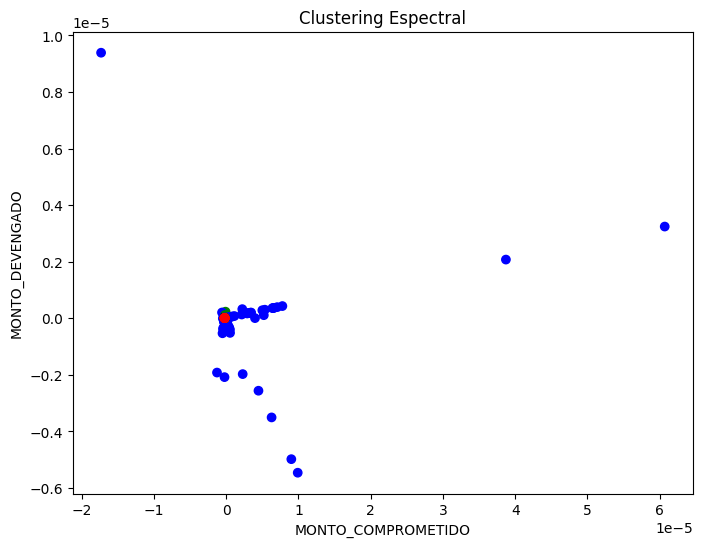

In [106]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=colormap[labels], cmap='viridis', marker='o')
plt.title('Clustering Espectral')
plt.xlabel('MONTO_COMPROMETIDO')
plt.ylabel('MONTO_DEVENGADO')
plt.show()

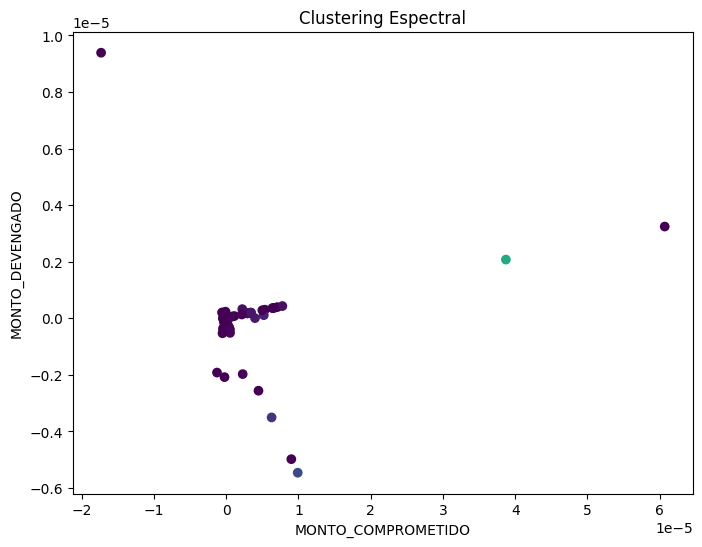

In [107]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', marker='o')
plt.title('Clustering Espectral')
plt.xlabel('MONTO_COMPROMETIDO')
plt.ylabel('MONTO_DEVENGADO')
plt.show()

In [108]:
ari = adjusted_rand_score(y, labels)
print(f'Adjusted Rand Index (ARI): {ari}')

Adjusted Rand Index (ARI): 0.18659780138494778


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
